Loading clustering artifacts...
Running t-SNE...
Running UMAP...


/Users/nicole_ren/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/nicole_ren/Library/Python/3.9/lib/python/site-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/Users/nicole_ren/Library/Python/3.9/lib/python/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


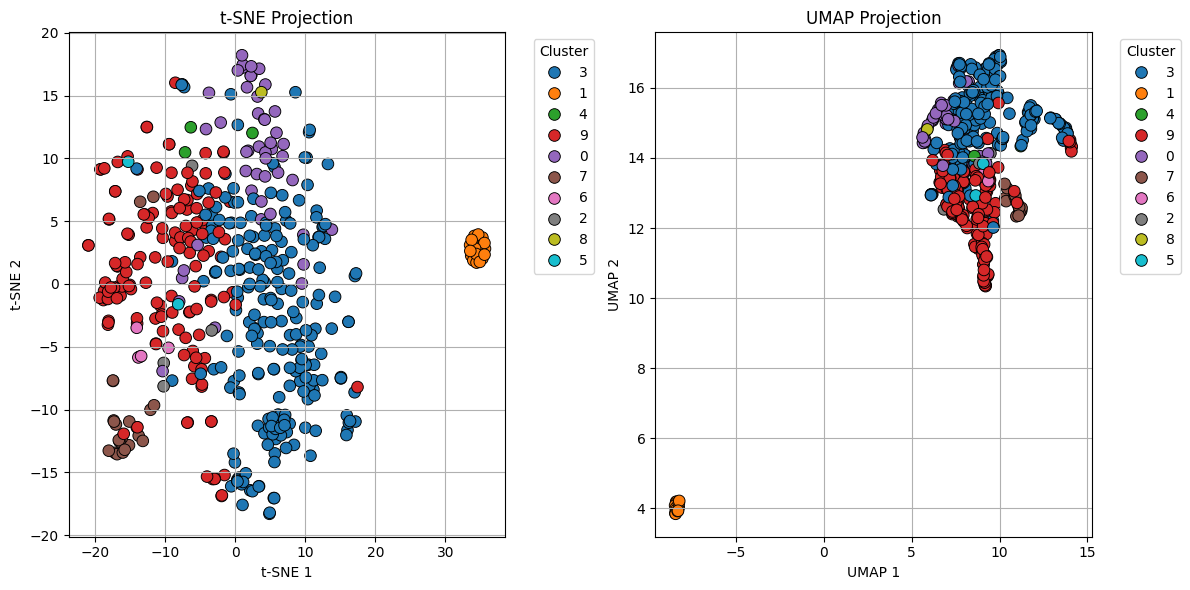

✅ Visualizations saved to 'tsne_umap_cluster_plot.png'


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.manifold import TSNE
import umap.umap_ as umap

# -------------------------------
# Load saved data
# -------------------------------
print("Loading clustering artifacts...")
avg_distance_32 = np.load("avg_distance_32.npy")
kmeans_model = joblib.load("./datasets/kmeans_final.joblib")
all_stock_ids = joblib.load("./datasets/all_stock_ids.joblib")
labels = kmeans_model.labels_

# -------------------------------
# t-SNE projection
# -------------------------------
print("Running t-SNE...")
tsne = TSNE(n_components=2, metric="precomputed", random_state=42, perplexity=30, init='random')
tsne_coords = tsne.fit_transform(avg_distance_32)

# -------------------------------
# UMAP projection
# -------------------------------
print("Running UMAP...")
umap_model = umap.UMAP(n_components=2, metric="precomputed", random_state=42)
umap_coords = umap_model.fit_transform(avg_distance_32)

# -------------------------------
# Prepare plot DataFrames
# -------------------------------
df_tsne = pd.DataFrame({
    "STOCK": all_stock_ids,
    "x": tsne_coords[:, 0],
    "y": tsne_coords[:, 1],
    "CLUSTER": labels.astype(str)
})

df_umap = pd.DataFrame({
    "STOCK": all_stock_ids,
    "x": umap_coords[:, 0],
    "y": umap_coords[:, 1],
    "CLUSTER": labels.astype(str)
})

# -------------------------------
# Plot t-SNE
# -------------------------------
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_tsne, x="x", y="y", hue="CLUSTER", palette="tab10", s=70, edgecolor="k")
plt.title("t-SNE Projection")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# -------------------------------
# Plot UMAP
# -------------------------------
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_umap, x="x", y="y", hue="CLUSTER", palette="tab10", s=70, edgecolor="k")
plt.title("UMAP Projection")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.savefig("tsne_umap_cluster_plot.png")
plt.show()

print("✅ Visualizations saved to 'tsne_umap_cluster_plot.png'")
